# Issue#2: Sklearn decision tree examples

## Setup
References:
1.   [Sklearn documentation](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html)
2.   [Blog](https://mljar.com/blog/visualize-decision-tree/)



In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

The iris data set has 150 records (data points), 4 features, and 3 categories.

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

print(type(X),type(y))
print(X.shape,y.shape)
print(iris.keys())
print(iris.feature_names)
print(iris.target_names)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4) (150,)
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
# fit the classifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(iris.data, iris.target)

## Tree Plots
Classic tree plots to visualize the splits.
*   `class_names` to set class names
*   `feature_names` to set feature names
*   `filled=True` to show colors w.r.t. each class
*   `proportions=True` to show percentasges of each class instead of numbers
*   `label` to set if show labels
*   `impurity` to set if show impurity
*   `max_depth` to set the maximum depth of the tree



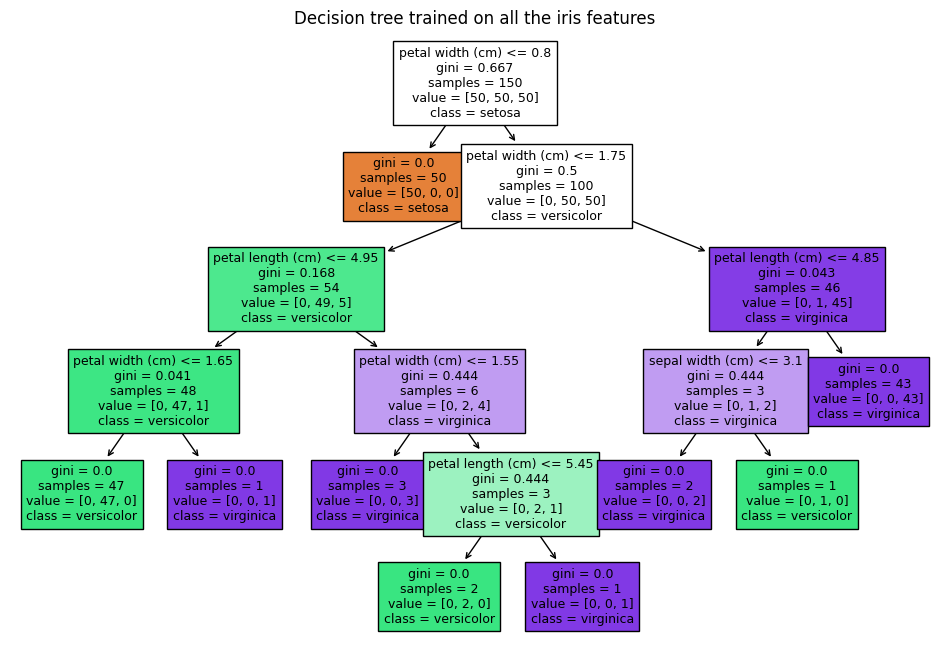

In [4]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True,
               class_names=list(iris.target_names),
               feature_names = iris.feature_names,
               fontsize=9)
plt.title("Decision tree trained on all the iris features")
plt.show()

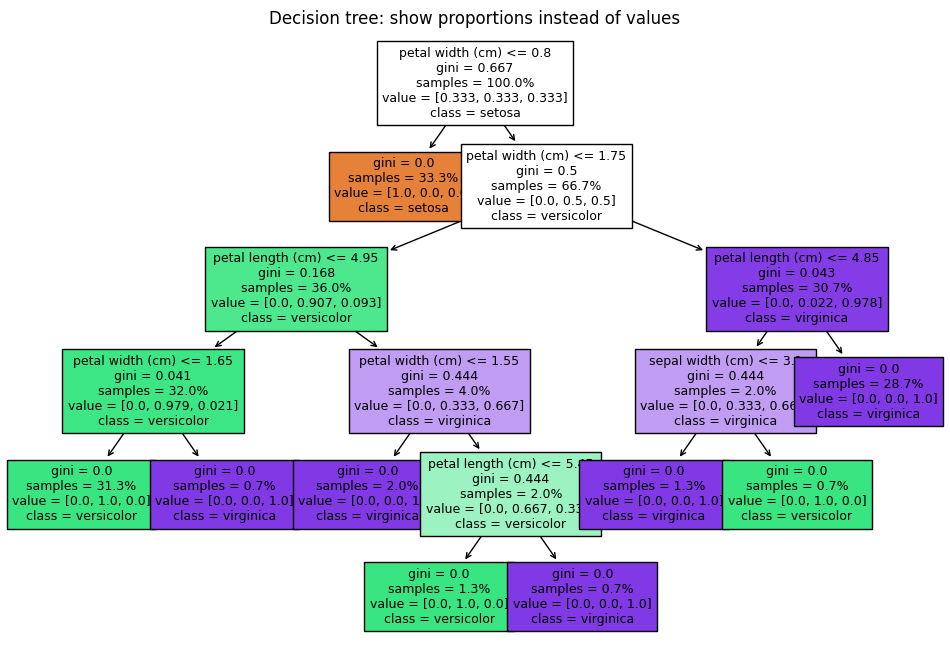

In [5]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True,
               class_names=list(iris.target_names),
               feature_names = iris.feature_names,
               proportion=True,
               fontsize=9)
plt.title("Decision tree: show proportions instead of values")
plt.show()

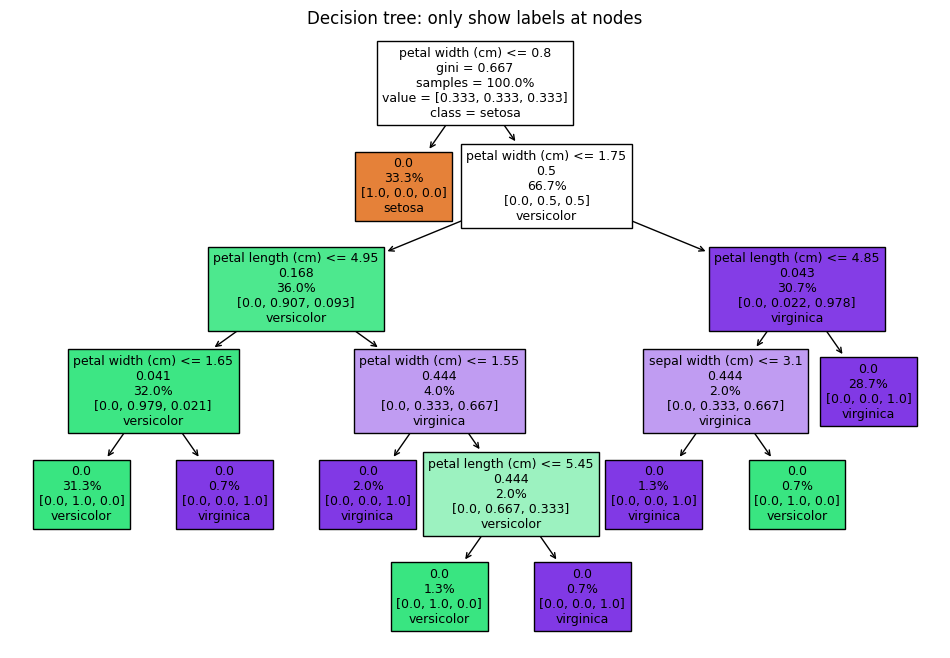

In [6]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True,
               class_names=list(iris.target_names),
               feature_names = iris.feature_names,
               proportion=True,
               label='root',
               fontsize=9)
plt.title("Decision tree: only show labels at nodes")
plt.show()

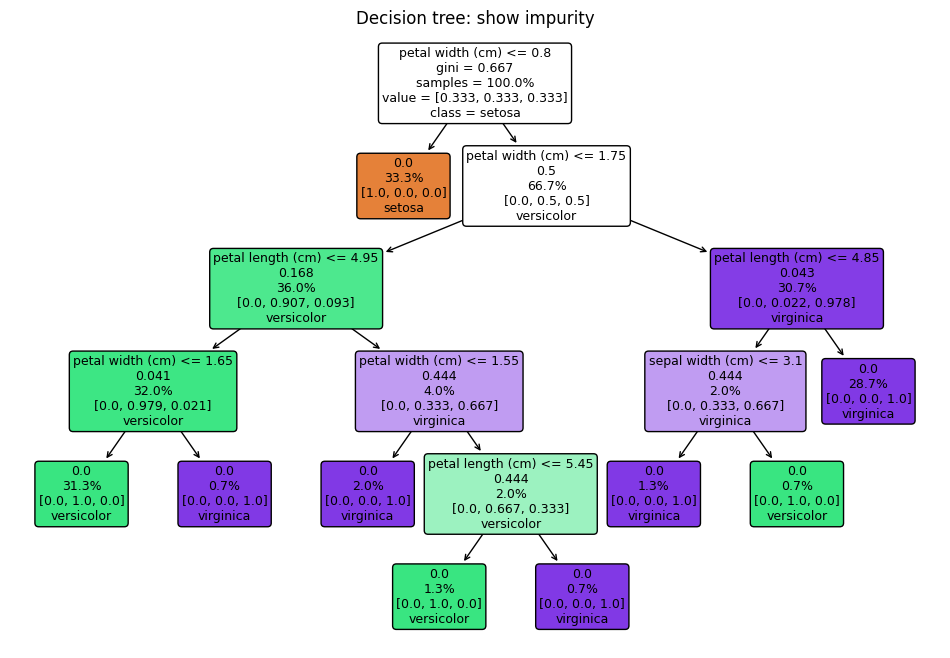

In [7]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True,
               class_names=list(iris.target_names),
               feature_names = iris.feature_names,
               proportion=True,
               label='root',
               impurity=True,
               rounded=True,
               fontsize=9)
plt.title("Decision tree: show impurity")
plt.show()

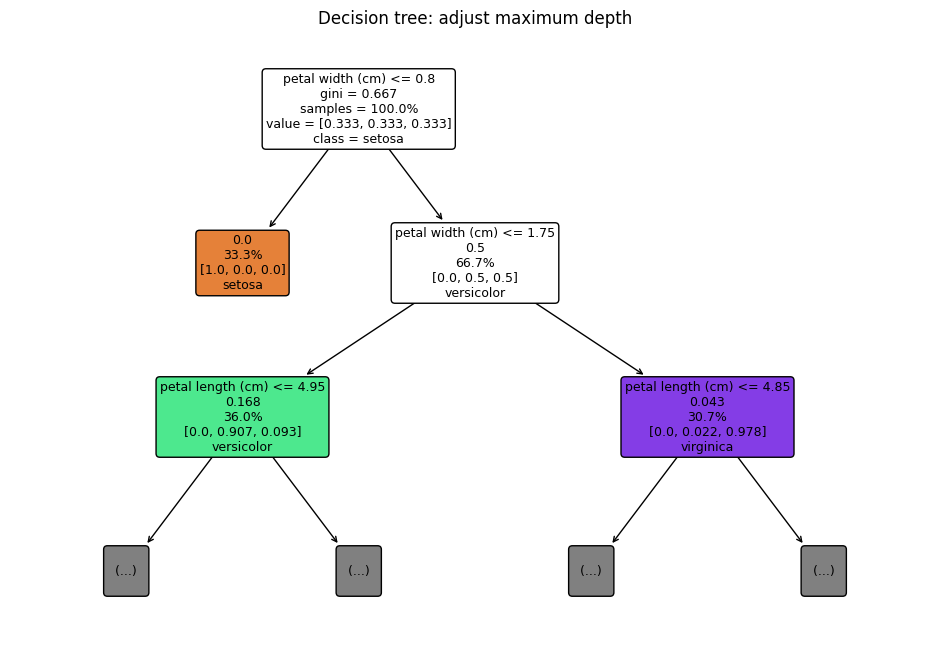

In [8]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True,
               class_names=list(iris.target_names),
               feature_names = iris.feature_names,
               proportion=True,
               label='root',
               max_depth=2,
               rounded=True,
               fontsize=9)
plt.title("Decision tree: adjust maximum depth")
plt.show()

## Text Representation
Print the tree structure as a string, which can be saved as a `.txt` file.

Use cases include:
1.   Applications without user interface
2.   Terminal output
3.   Event logs

In [9]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



## Decision Boundaries
Plot decision boundaries between 2 features

/tmp/ipykernel_3972/2377923767.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_3972/2377923767.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)
/tmp/ipykernel_3972/2377923767.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_3972/2377923767.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)
/tmp/ipykernel_3972/2377923767.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_3972/2377923767.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)
/tmp/ipykernel_3972/2377923767.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_3972/

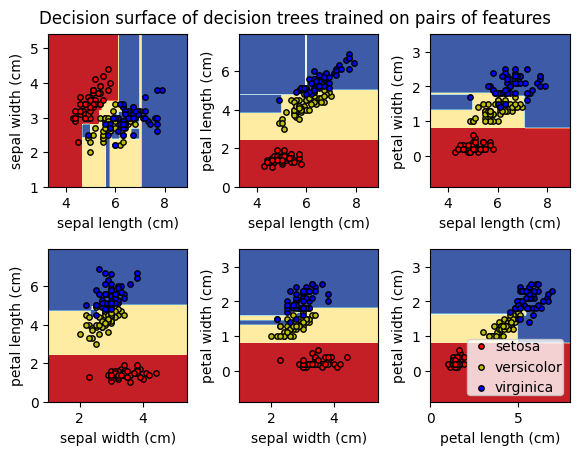

In [10]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf_two_features = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf_two_features,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")